# Exploratory Economic Data Analysis with FRED #

### Setup: Installations, Imports, Fundamental Objects ###

In [151]:
#install FredApi
!pip install fredapi 

#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

#style
plt.style.use('fivethirtyeight')

#window
pd.set_option("display.max_columns", 500)

#color palette
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#import FredApi
from fredapi import Fred

#assign registered api key to variable
fred_key = '6cac22ead88cd114bfc7eff69e7cc291'

#create fred object
fred = Fred(api_key=fred_key)

### Search for S&P 500 data ###

In [152]:
#searching for S&P 500 data
sp_search = fred.search('S&P', order_by = 'popularity')

#glimpse results
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-22,2024-01-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-22 09:00:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-22,2024-01-22,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-01-22,2024-01-22,S&P 500,2014-01-23,2024-01-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-22 19:11:04-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-22,2024-01-22,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-22,2024-01-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-22 09:00:07-06:00,81,This data represents the effective yield of th...


### Pull raw data and plot ###

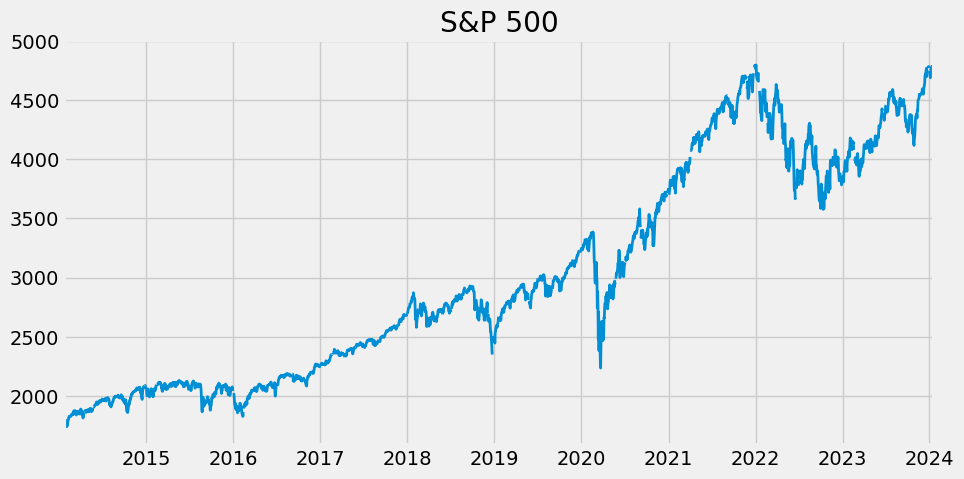

In [153]:
#pull S&P 500 from series id 
sp500 = fred.get_series(series_id = 'SP500')

#plot
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw = 2)
plt.show()

Above plot displays the points of the S&P 500 over time

### Search for Unemployment Data by State ###

In [161]:
#general filtering
unemp_df = fred.search('unemployment rate by state', filter = ('frequency','Monthly')) 
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') 
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

#removing rows that contained data for cities/regions/districts instead of states
strings_to_delete = ['LASMT261982000000003', 'LASMT391746000000003', 'USAURAMS' ,
                     'CNEWUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'DCUR', 'PRUR'] 
mask = unemp_df['id'].isin(strings_to_delete)
unemp_df = unemp_df[~mask]

#print dataframe
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-01-22,2024-01-22,Unemployment Rate in California,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:01-06:00,61,None
TXUR,TXUR,2024-01-22,2024-01-22,Unemployment Rate in Texas,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:03-06:00,50,None
NYUR,NYUR,2024-01-22,2024-01-22,Unemployment Rate in New York,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:02-06:00,48,None
FLUR,FLUR,2024-01-22,2024-01-22,Unemployment Rate in Florida,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:02-06:00,47,None
OHUR,OHUR,2024-01-22,2024-01-22,Unemployment Rate in Ohio,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:04-06:00,36,None
ALUR,ALUR,2024-01-22,2024-01-22,Unemployment Rate in Alabama,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:03-06:00,36,None
PAUR,PAUR,2024-01-22,2024-01-22,Unemployment Rate in Pennsylvania,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:04-06:00,36,None
ILUR,ILUR,2024-01-22,2024-01-22,Unemployment Rate in Illinois,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:05-06:00,27,None
MIUR,MIUR,2024-01-22,2024-01-22,Unemployment Rate in Michigan,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:04-06:00,34,None


### Pull and Join States Data Series ###

In [162]:
all_results = [] #store results in list

#loop through index, assign columns by id
for myid in unemp_df.index:  
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

In [163]:
#concatenate unemployment rates (by id) and print
unemp_results = pd.concat(all_results, axis = 1)

#check for na values
unemp_results.isna().sum(axis = 1)

#drop na values
unemp_results.dropna()

#replace column ids with state names
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_results.columns = [id_to_state[c] for c in unemp_results.columns]

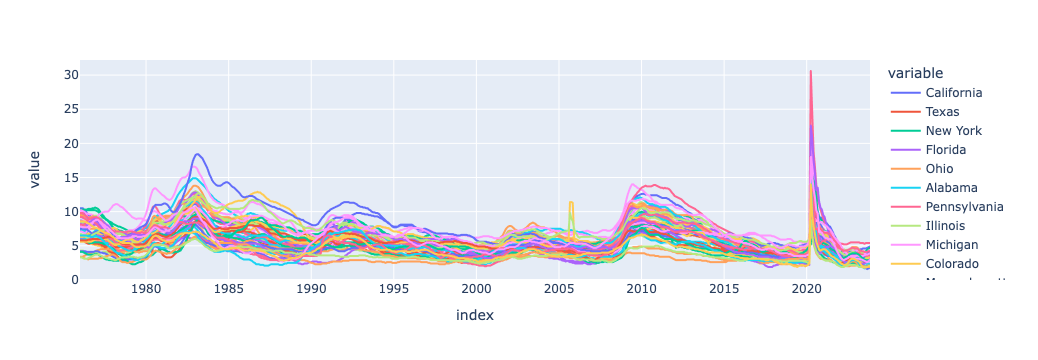

In [164]:
px.line(unemp_results)

Double-clicking on states in the legend will allow you to isolate them ^

### Pull April 2020 Unemployment Rate Per State

April 2020 was the height of the unemployment spike due to the Covid-19 pandemic, we can visualize it in more detail to see how it affected different states.

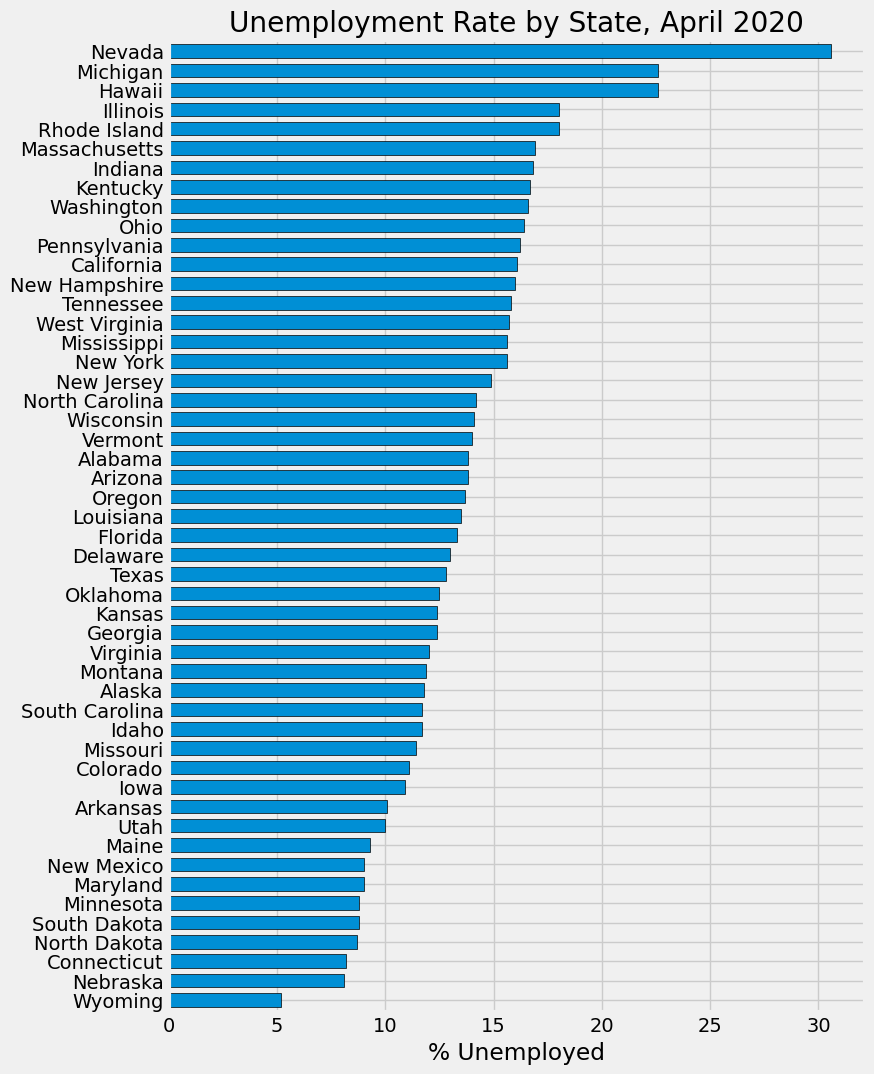

In [167]:
#Plot results for specific month (April) horizontally
ax = unemp_results.loc[unemp_results.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind = 'barh', figsize = (8, 12), width=0.7, edgecolor = 'black', title = 'Unemployment Rate by State, April 2020')

#remove legend
ax.legend().remove()

#set x-axis label
ax.set_xlabel('% Unemployed')

#display plot
plt.show()

### Search for Labour Force Participation ###

In [182]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-01-22,2024-01-22,Labor Force Participation Rate for California,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:16-06:00,13,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-01-22,2024-01-22,Labor Force Participation Rate for Alabama,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:15-06:00,9,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2024-01-22,2024-01-22,Labor Force Participation Rate for Florida,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:08-06:00,21,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-01-22,2024-01-22,Labor Force Participation Rate for Michigan,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:10-06:00,20,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2024-01-22,2024-01-22,Labor Force Participation Rate for Minnesota,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:09-06:00,18,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2024-01-22,2024-01-22,Labor Force Participation Rate for Kentucky,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:07-06:00,17,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2024-01-22,2024-01-22,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:08-06:00,18,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-01-22,2024-01-22,Labor Force Participation Rate for Mississippi,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:13-06:00,17,A state's labor-force participation rate is th...
LBSSA24,LBSSA24,2024-01-22,2024-01-22,Labor Force Participation Rate for Maryland,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-22 09:02:12-06:00,17,A state's labor-force participation rate is th...


### Pull raw data ###

In [ ]:
#replace id with title
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

#loop through index, assign columns by id
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

### Plot Unemployment vs. Labour Participation for States ###

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

#loop through states in unemployment, plot against labour participation
i = 0
for state in unemp_results.columns:
    if state in ["Puerto Rico"]:  #skip Puerto Rico
        continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()